## HAAR Features

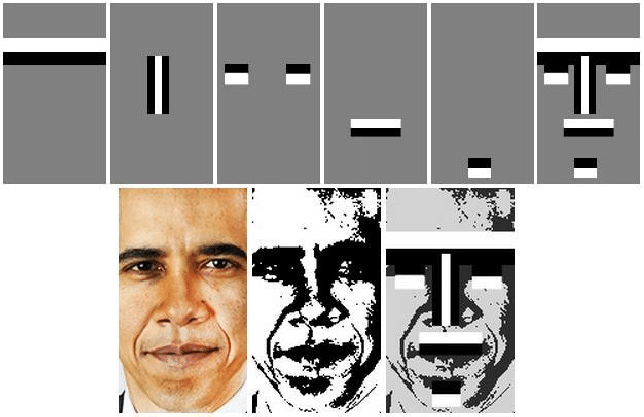

https://en.wikipedia.org/wiki/Haar-like_feature

In [ ]:
## We will collect the Data
#1. Download the Images -> Fatkun batch downloader extension of chrome
##2. Kaggle like websites
##3. Phone camera
#4. Webcam
#5. Screenshots

In [ ]:
## For HAAR Cascades, You need both positive images and Negative Images
## Positive => Object of intrest exist in these Images
# Negative => Object of intrest does not exist in these Images

In [1]:
import os
os.mkdir("Custom_Train_CV")

In [2]:
os.chdir("Custom_Train_CV/") # Changing PWD

In [4]:
os.mkdir("Positive")
os.mkdir("Negative")

In [5]:
os.listdir()

['Negative', 'Positive']

In [6]:
## We will collect the Data from Webcam
import cv2

cap = cv2.VideoCapture(0)
n_count = 0
p_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        cv2.imshow("Video",frame)
        k = cv2.waitKey(0)
        if k==ord('n'):
            cv2.imwrite(f"Negative/neg_{n_count}.jpg", frame)
            n_count+=1
        elif k==ord('p'):
            cv2.imwrite(f"Positive/pos_{p_count}.jpg", frame)
            p_count+=1
        elif k==ord('s'):
            continue
        elif k==27:
            break
cap.release()
cv2.destroyAllWindows()

In [7]:
## Next step is to write the path of all negative images in a txt file
for fi in os.listdir("Negative/"):
    with open("neg.txt","a") as f:
        f.write(f"Negative/{fi}\n")

In [ ]:
## Next step is to create a Positive Images along with location of Object of Intrest
# cvat, online tools. But for now we will use
#opencv_annotation tool
https://sourceforge.net/projects/opencvlibrary/files/
https://sourceforge.net/projects/opencvlibrary/files/3.4.16/
    
## Install To specific Directory of Choice
#Then goto this path
opencv\build\x64\vc15\bin

In [ ]:
## open Command Prompt
#from your working directory, Give the path of opencv_annotation.exe
execute the following
..\opencv\build\x64\vc15\bin\opencv_annotation.exe -annotations=pos.txt -images=Positive
# it will open image by image
# In an image, left click where object of intrest exist and drag the entire object, Once done
# click left click again to release the selection. 
# It will form a red rectangle, to confirm the selection use "c" (after confirming it will become green)
# You mistakenly selected the rectangle before confirming click anywhere
# You wanted to delete the confirmed selection use "d"
# To go to next image "n"
# If multiple objects exists in single image, select all and confirm all
# To close the program use "esc"

In [ ]:

C:\Users\sures\Desktop\DataScience_Materials\Innomatics\AI_Elite_11\DeepLearning\Custom_Train_CV>..\opencv\build\x64\vc15\bin\opencv_annotation.exe -annotations=pos.txt -images=Positive
* mark rectangles with the left mouse button,
* press 'c' to accept a selection,
* press 'd' to delete the latest selection,
* press 'n' to proceed with next image,
* press 'esc' to stop.


In [ ]:
## Next step is to create Data for Training
..\opencv\build\x64\vc15\bin\opencv_createsamples.exe -info pos.txt -num 10000 -w 24 -h 24 -vec pos.vec
#-info => positive images annotation file
#-num => Number of vectors
#-w => Minimum width of block to detect
#-h => Minimum height of block to detect
# -vec => Where to store result vector

In [ ]:
## Train the Model
..\opencv\build\x64\vc15\bin\opencv_traincascade.exe -data Model -vec pos.vec -bg neg.txt -w 24 -h 24 -numPos 20 -numNeg 20 -numStages 10
## -data => Folder name where model result has to be saved. 
##-vec => Positive images vector file
# -bg => negative images file
#-w => Minimum width of block to detect
#-h => Minimum height of block to detect
#-numPos => Number of positive samples use for training (This has to be less than number of samples)
#-numNeg => Number of Negative samples use for training (This can be any number)
#-numStages => Number of stages to train, Higher the number of stages, higher the quality of the model

In [15]:
## Test the model. 
# Main Model will be saved as Cascade.xml. One can rename as you like
aman = cv2.CascadeClassifier("Model/AmanJoshi.xml")

test = cv2.imread("pos_11.jpg")

findings = aman.detectMultiScale(test)

In [17]:
for finding in findings:
    x,y,w,h = finding
    cv2.rectangle(test, (x,y),(x+w,y+h), (0,255,0), 1)
    cv2.putText(test, "Aman",(x,y-10),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,255,0),1,cv2.LINE_AA)
cv2.imshow("Aman",test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        findings = aman.detectMultiScale(frame)
        
        for finding in findings:
            x,y,w,h = finding
            cv2.rectangle(frame, (x,y),(x+w,y+h), (0,255,0), 1)
            cv2.putText(frame, "Aman",(x,y-10),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,255,0),1,cv2.LINE_AA)
        cv2.imshow("Aman",frame)
        k = cv2.waitKey(1)
        if k==27:
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
## Capture Screenshots of Laptop for Images
!pip install pyautogui keyboard

In [ ]:
import os
os.mkdir("Keyboard")
os.mkdir("Keyboard/Positive")
os.mkdir("Keyboard/Negative")

In [1]:
## Capture Keyboard Events to Save Screenshots
import pyautogui
import keyboard


pos_count=0
neg_count = 0

def positive_img():
    global pos_count
    image = pyautogui.screenshot()
    image = image.resize((400,400))
    image.save(f"Keyboard/Positive/image_{pos_count}.jpg")
    pos_count+=1

def negative_img():
    global neg_count
    image = pyautogui.screenshot()
    image = image.resize((400,400))
    image.save(f"Keyboard/Negative/image_{neg_count}.jpg")
    neg_count+=1
    
keyboard.add_hotkey('p',positive_img)
keyboard.add_hotkey('n',negative_img)

while True:
    event = keyboard.read_event()
    if event.event_type == keyboard.KEY_DOWN and event.name=='p':
        print("Pressed P")
    elif event.event_type == keyboard.KEY_DOWN and event.name=='n':
        print("Pressed n")
    elif event.event_type == keyboard.KEY_DOWN and event.name=='b':
        break
    else:
        continue


Pressed n
Pressed n
Pressed P
Pressed n
Pressed P
Pressed P
Pressed P
Pressed P
Pressed P
Pressed P
Pressed P
Pressed n
Pressed n
